# Example of pumping analysis for the Hantush Jacob solution

## 1) Importing the model and tools

In [ ]:
pip install detect_delimeter

In [1]:
from hytoolpy.tools import load, diagnostic, fitting, trial, derivative, hyclean
from hytoolpy.models import htj
import matplotlib.pyplot as plt

## 2) Loading the data and plot the diagnostic graph
## The data set for this example comes from the following reference: 
### "Hall, P. Water well and aquifer test analysis 1996, Water Resources Publications, LLC, 412 pp. Example  Fig 11.14 p.267-268"

In [4]:
# Please be sure that your time is in s & is name is inside the following list ['t','time','temps']
# Please be sure that your drawdown is in m & is name is inside the following list ['s','drawdown','rabattement']
t,s = load.load(r"test_htj.csv")
print(t)
print(s)

[6.011520e+00 1.817826e+01 2.985312e+01 4.120086e+01 5.972580e+01
 1.194072e+02 1.795572e+02 3.017016e+02 4.211508e+02 6.024780e+02
 7.251540e+02 8.946240e+02 1.202970e+03 1.483842e+03 1.785672e+03
 2.431026e+03 2.961420e+03 3.563178e+03 4.182924e+03 5.353092e+03
 7.108380e+03 8.984580e+03 1.080840e+04 1.253154e+04 1.435164e+04
 1.791456e+04 2.155230e+04 2.529204e+04 2.932098e+04 3.357372e+04
 3.615006e+04 4.190862e+04 4.739988e+04 5.427492e+04 5.989332e+04
 6.691200e+04 7.661700e+04 8.454840e+04 1.055256e+05 1.208316e+05
 1.489746e+05 1.748346e+05 2.051844e+05]
[ 3.43543128  6.67859472  8.32289928  9.44242968 10.63398432 13.00834584
 14.38552368 16.07859624 17.21272656 18.2927244  19.02936504 19.86646776
 20.66141664 21.33694488 21.95599368 22.91687568 23.41074312 23.82935544
 24.25677648 24.86683368 25.49014968 25.94311296 26.12129904 26.39839272
 26.679144   26.8601952  27.14292768 27.0351504  27.12451776 27.11641008
 27.21050184 27.30044832 27.2930112  27.28487304 27.27895992 27.27

C:\Users\celestin.dartigues\AppData\Local\Temp\ipykernel_37804\1142427788.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  a.show()


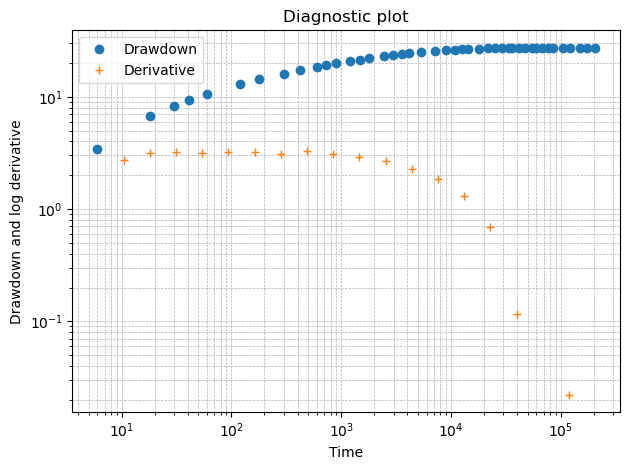

In [5]:
# We choose 's' method which corresponds to the spline derivative. Bourdet 'b' & Horner 'h' are also available
#20 = number of point for the derivative, if Bourdet is choosen please keep npoint between 2 & 7
a = diagnostic.diagnostic(t,s,20,'s')
a.show()

## 3) Solving the test with the Hantush & Jacob solution (leaky aquifer)
###  - a) Initial guess to have Jacob slope & t0
###  - b) Non linear fit to determine the optimized parameter
###  - c) Visualization with trial function

In [6]:
# Initial guessing
p0 = htj.gss(t,s)
print(p0)

[7.82993532 2.69741056 0.02003701]


In [8]:
# Optimized parameters
p,stats2 = fitting.fit(p0,t,s,'htj')
print(p,stats2)

[7.97811706 2.82854935 0.02191655] {'p_std': array([0.17611146, 0.3315209 , 0.0020612 ]), 'r2': 0.9999278731345576, 'rmse': 0.05600626431096823}


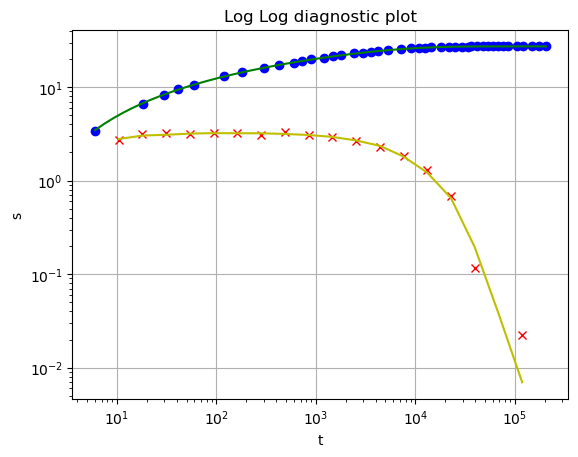

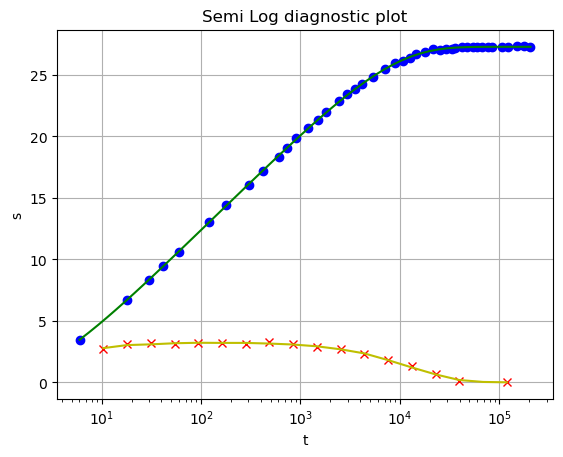

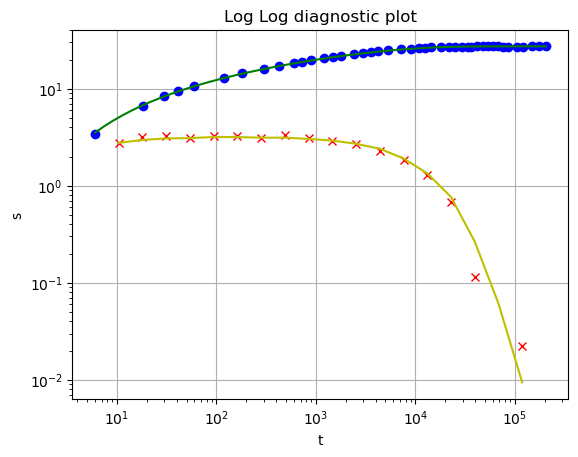

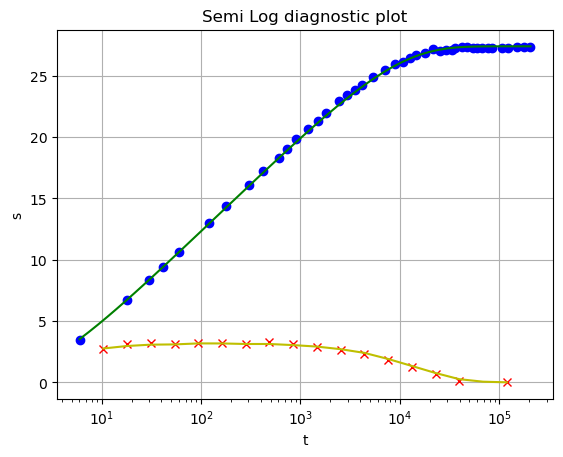

In [13]:
# Plotting the curve and derivative with p0 & p --> trial function
trial.trial(p,t,s,'htj',20)

trial.trial(p0,t,s,'htj',20)

## Report Generation
### 1) Fixing the parameter Q =6.309 e-3 m3/s  Pumping rate ; r =3.048 m Distance to the pumping well ; e =6.096 m  Thickness of the aquitard
### Report generation
### Results found by Hall, 1999 are T = 7.77 e-5 m2/s ; S = 5.0193 e-4

In [14]:
d = [6.309e-3,3.048,6.096]

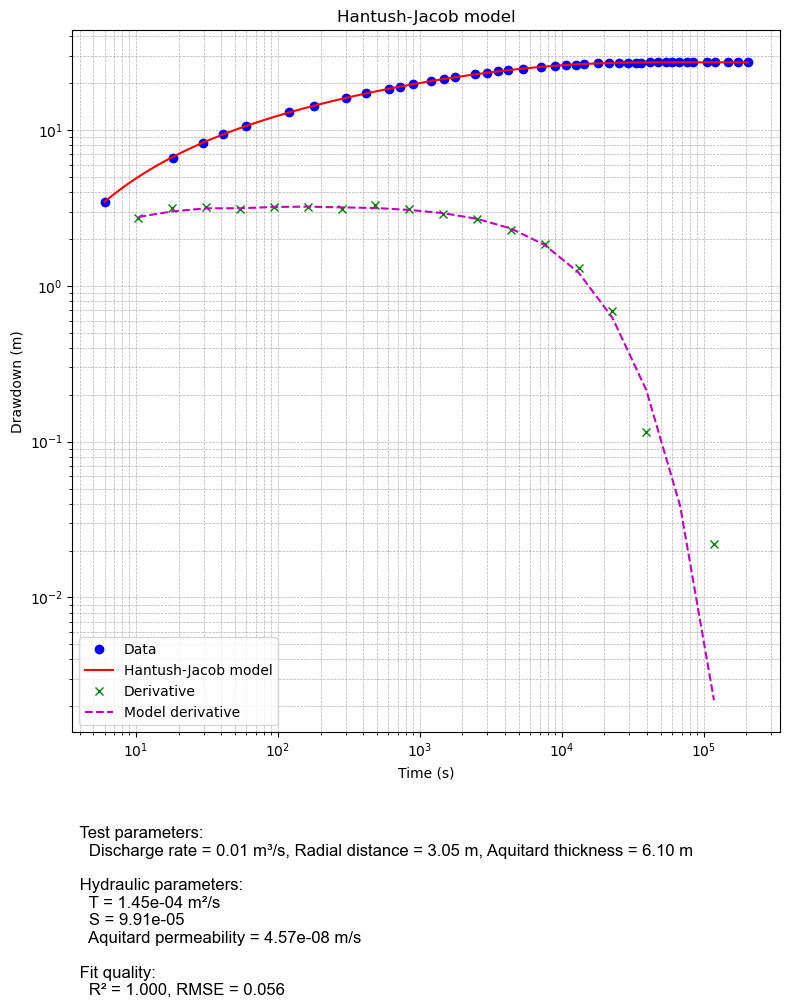

In [15]:
htj.rpt(p,stats2,t,s,d,20, "Report")